In [60]:
from typing import List, Optional, Tuple, Union
import numpy as np
import particle_simulators as ps
from importlib import reload
from matplotlib import pyplot as plt
import visualize as vis
reload(vis)
reload(ps)

anchor1= np.array([1., 0, 0]) 
anchor2= np.array([0, 1., 0])

anchors = np.vstack((anchor1, anchor2))
print(anchors)

myseed= 10
weight = 2
T = 15
z_list, t_grid = ps.simulate_particles_with_anchor(
        seed=myseed,
        anchor=anchors,T=T,
        anchor_weight=weight
    )
print(z_list[-1].shape)

[[1. 0. 0.]
 [0. 1. 0.]]
Calling simulate_particles with (multi-anchor, population mode):
            free_n0=64, M=2, T=15, dt=0.1, d=3, beta=1.0,
            half_sph=False, seed=10
Anchors (rows):
 [[1. 0. 0.]
 [0. 1. 0.]]
 weights: [2. 2.]
(66, 3)


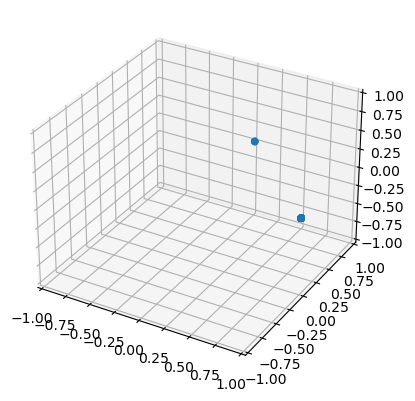

In [131]:
from mpl_toolkits.mplot3d import Axes3D        # only needed for old Matplotlibs
import matplotlib.pyplot as plt
t = -1
xs, ys, zs = z_list[t][:, 0], z_list[t][:, 1], z_list[t][:, 2]

fig = plt.figure()
ax  = fig.add_subplot(111, projection="3d")    # create 3-D axes
ax.set_xlim([-1, 1]) 
ax.set_ylim([-1, 1]) 
ax.set_zlim([-1, 1]) 

ax.scatter(xs, ys, zs, s=20)   

Calling simulate_particles with (multi-anchor, population mode):
            free_n0=64, M=2, T=15, dt=0.1, d=3, beta=1.0,
            half_sph=False, seed=10
Anchors (rows):
 [[1. 0. 0.]
 [0. 1. 0.]]
 weights: [1. 1.]
(66, 3)
Calling simulate_particles with (multi-anchor, population mode):
            free_n0=64, M=2, T=15, dt=0.1, d=3, beta=1.0,
            half_sph=False, seed=10
Anchors (rows):
 [[1. 0. 0.]
 [0. 1. 0.]]
 weights: [2. 2.]
(66, 3)
Calling simulate_particles with (multi-anchor, population mode):
            free_n0=64, M=2, T=15, dt=0.1, d=3, beta=1.0,
            half_sph=False, seed=10
Anchors (rows):
 [[1. 0. 0.]
 [0. 1. 0.]]
 weights: [4. 4.]
(66, 3)
Calling simulate_particles with (multi-anchor, population mode):
            free_n0=64, M=2, T=15, dt=0.1, d=3, beta=1.0,
            half_sph=False, seed=10
Anchors (rows):
 [[1. 0. 0.]
 [0. 1. 0.]]
 weights: [8. 8.]
(66, 3)
Calling simulate_particles with (multi-anchor, population mode):
            free_n0=64, M=2

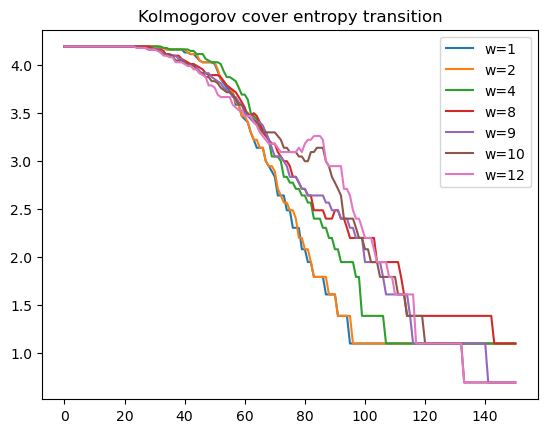

In [78]:
import evaluators as ev

myseed= 10

plt.figure() 
for weight in [1, 2, 4, 8, 9, 10, 12]:  
    weight = weight
    T = 15
    z_list, t_grid = ps.simulate_particles_with_anchor(
            seed=myseed,
            anchor=anchors,T=T,
            anchor_weight=weight
        )
    print(z_list[-1].shape)

    ev.cover_entropy(z_list[t], eps=0.01)
    entropy_logs = [] 

    for t in range(len(z_list)): 
        entropy_logs.append(ev.cover_entropy(z_list[t], eps=0.01))

    entropy_logs = np.array(entropy_logs)
    plt.plot(entropy_logs, label=f"""w={weight}""" )
    
plt.title(f"""Kolmogorov cover entropy transition""") 
plt.legend()

In [91]:
weights = np.linspace(8, 10, 50) 
last_entropy_logs = [] 

for weight in  np.linspace(8, 10, 50):  
    weight = weight
    T = 15
    z_list, t_grid = ps.simulate_particles_with_anchor(
            seed=myseed,
            anchor=anchors,T=T,
            anchor_weight=weight
        )
    print(z_list[-1].shape)

    ev.cover_entropy(z_list[t], eps=0.01)

    last_entropy_logs.append(ev.cover_entropy(z_list[-1], eps=0.01))

last_entropy_logs = np.array(last_entropy_logs)


Calling simulate_particles with (multi-anchor, population mode):
            free_n0=64, M=2, T=15, dt=0.1, d=3, beta=1.0,
            half_sph=False, seed=10
Anchors (rows):
 [[1. 0. 0.]
 [0. 1. 0.]]
 weights: [8. 8.]
(66, 3)
Calling simulate_particles with (multi-anchor, population mode):
            free_n0=64, M=2, T=15, dt=0.1, d=3, beta=1.0,
            half_sph=False, seed=10
Anchors (rows):
 [[1. 0. 0.]
 [0. 1. 0.]]
 weights: [8.04081633 8.04081633]
(66, 3)
Calling simulate_particles with (multi-anchor, population mode):
            free_n0=64, M=2, T=15, dt=0.1, d=3, beta=1.0,
            half_sph=False, seed=10
Anchors (rows):
 [[1. 0. 0.]
 [0. 1. 0.]]
 weights: [8.08163265 8.08163265]
(66, 3)
Calling simulate_particles with (multi-anchor, population mode):
            free_n0=64, M=2, T=15, dt=0.1, d=3, beta=1.0,
            half_sph=False, seed=10
Anchors (rows):
 [[1. 0. 0.]
 [0. 1. 0.]]
 weights: [8.12244898 8.12244898]
(66, 3)
Calling simulate_particles with (multi-ancho

(66, 3)


Text(0.5, 0, 'weight')

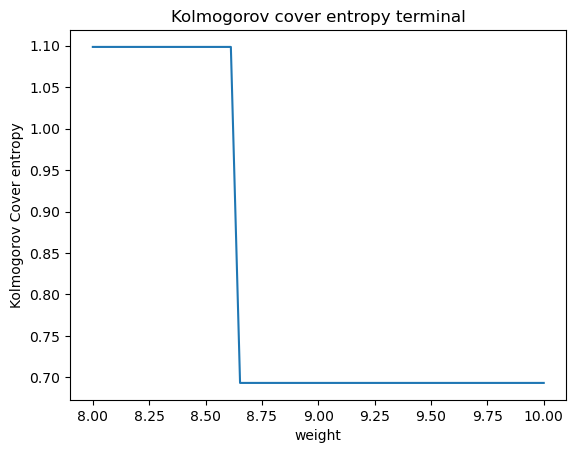

In [92]:

plt.plot(weights, last_entropy_logs )    
plt.title(f"""Kolmogorov cover entropy terminal""") 
plt.ylabel('Kolmogorov Cover entropy') 
plt.xlabel('weight') 

In [149]:
from importlib import reload
reload(ev)
reload(ps)
from tqdm import tqdm

wcnt=100
times = len(z_list)
realtimes = np.linspace(0, 15, times)
answers = np.zeros([wcnt, times]) 

weights = np.linspace(1, 10, wcnt) 

T = 15
for k in  tqdm(range(wcnt)):  
    weight = weights[k] 
    z_list, t_grid = ps.simulate_particles_with_anchor(
            seed=myseed,
            anchor=anchors,T=T,
            anchor_weight=weight, verbose=False
        )
    for t in range(times): 
        answers[k, t] = ev.proximity_probability(z_list[t], delta=0.01)  
        

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 69.67it/s]


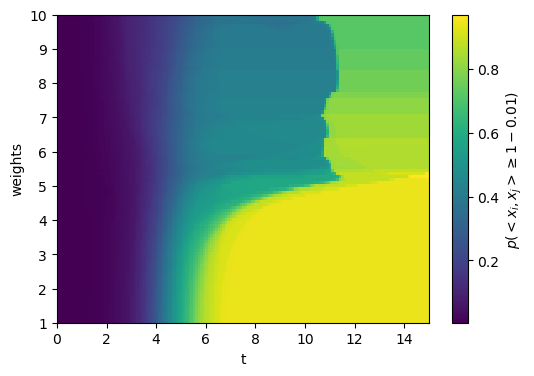

In [152]:
fig, ax = plt.subplots(figsize=(6, 4))

im = ax.imshow(
    answers,
    aspect="auto",        # 画素を歪ませず縦横比を自動調整
    origin="lower",       # k=0 を下に
    extent=[
        realtimes[0], realtimes[-1],   # x 範囲
        weights[0], weights[-1]    # y 範囲
    ],
    cmap="viridis",       # お好みで
    interpolation="nearest"
)
ax.set_xlabel("t")
ax.set_ylabel("weights")
fig.colorbar(im, ax=ax, label=f"""$p(<x_i, x_j> \geq 1- 0.01) $""")

plt.show()

In [153]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering   # pip install scikit-learn

def cluster_proportions_auto(
    points: np.ndarray,
    *,
    max_clusters: int = 3,
    eps: float = 0.05,
) -> np.ndarray:
    """
    Find clusters automatically by *merging any pair whose linkage distance
    is < eps*, then compress the result to a fixed-length vector.

    Parameters
    ----------
    points : (N, d) ndarray
        Particle positions.
    max_clusters : int
        Length of the returned vector.  If the merge rule yields fewer than
        `max_clusters` clusters, the tail is filled with zeros.  If it yields
        more, the smallest leftover clusters are aggregated into the last slot
        so the probabilities still sum to 1.
    eps : float
        Distance threshold for merging (ε-vicinity).

    Returns
    -------
    a : (max_clusters,) ndarray
        Cluster proportions ∑ a = 1.  `a[k] · N` is the population of (merged)
        cluster k.  The final element may be an aggregate of several tiny
        clusters if their count exceeded `max_clusters`.
    """
    if points.ndim != 2:
        raise ValueError("`points` must be 2-D (N, d)")

    # ------------------------------------------------------------------ #
    # 1) distance-threshold agglomerative clustering
    # ------------------------------------------------------------------ #
    #   n_clusters=None lets scikit-learn stop WHEN distance > eps
    clust = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=eps,
        linkage="average",
    )
    labels = clust.fit_predict(points)          # (N,) ints
    counts = np.bincount(labels)                # populations per cluster
    order  = np.argsort(counts)[::-1]           # largest first
    counts = counts[order]

    # ------------------------------------------------------------------ #
    # 2) compress / pad to exactly `max_clusters`
    # ------------------------------------------------------------------ #
    probs = counts / counts.sum()               # convert to proportions

    if len(probs) >= max_clusters:
        # keep the largest (max_clusters-1) clusters; aggregate the rest
        head = probs[: max_clusters - 1]
        tail = probs[max_clusters - 1 :].sum()      # possibly zero
        out = np.concatenate([head, [tail]])
    else:
        # fewer clusters than slots → pad with zeros
        pad = np.zeros(max_clusters - len(probs))
        out = np.concatenate([probs, pad])

    # numerical safety
    out[-1] = 1.0 - out[:-1].sum()
    return out




In [154]:
cluster_proportions_auto(z_list[-1], max_clusters=3, eps=0.01)

array([0.83333333, 0.16666667, 0.        ])

In [155]:
from importlib import reload
reload(ev)
reload(ps)
from tqdm import tqdm

wcnt=100
answers = [] 
weights = np.linspace(1, 10, wcnt) 

T = 15
for k in  tqdm(range(wcnt)):  
    weight = weights[k] 
    z_list, t_grid = ps.simulate_particles_with_anchor(
            seed=myseed,
            anchor=anchors,T=T,
            anchor_weight=weight, verbose=False
        )
    answers.append(cluster_proportions_auto(z_list[-1], max_clusters=3, eps=0.01)) 
        
answers = np.array(answers)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 137.69it/s]


/var/folders/xf/kry31x253qx54lk16j5mm6j00000gn/T/ipykernel_41524/1444611763.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(weights, np.log(answers[:, k]), label=f"""cluster {k} terminal proportion""" )


Text(0, 0.5, 'log(proportion)')

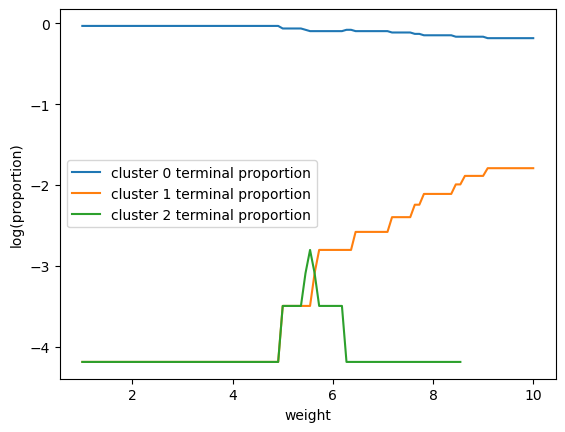

In [160]:
for k in range(3):
    plt.plot(weights, np.log(answers[:, k]), label=f"""cluster {k} terminal proportion""" )
    plt.legend()
plt.xlabel("weight") 
plt.ylabel("log(proportion)") 

In [138]:
answers[:, k]

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.93939394,
       0.93939394, 0.93939394, 0.93939394, 0.92424242, 0.92424242,
       0.92424242, 0.90909091, 0.90909091, 0.90909091, 0.90909091,
       0.90909091, 0.90909091, 0.90909091, 0.90909091, 0.90909091,
       0.90909091, 0.90909091, 0.90909091, 0.90909091, 0.90909091,
       0.90909091, 0.92424242, 0.92424242, 0.89393939, 0.90909091,
       0.90909091, 0.90909091, 0.90909091, 0.90909091, 0.90909091,
       0.90909091, 0.90909091, 0.90909091, 0.90909091, 0.90909091,
       0.90909091, 0.90909091, 0.90909091, 0.89393939, 0.89393939,
       0.89393939, 0.89393939, 0.89393939, 0.89393939, 0.89393939,
       0.89393939, 0.89393939, 0.87878788, 0.87878788, 0.87878788,
       0.86363636, 0.86363636, 0.86363636, 0.86363636, 0.86363636,
       0.86363636, 0.86363636, 0.86363636, 0.86363636, 0.86363636,
       0.86363636, 0.86363636, 0.86363636, 0.86363636, 0.84848485,
       0.84848485, 0.84848485, 0.84848485, 0.84848485, 0.84848

In [141]:
weights

array([ 5.        ,  5.05050505,  5.1010101 ,  5.15151515,  5.2020202 ,
        5.25252525,  5.3030303 ,  5.35353535,  5.4040404 ,  5.45454545,
        5.50505051,  5.55555556,  5.60606061,  5.65656566,  5.70707071,
        5.75757576,  5.80808081,  5.85858586,  5.90909091,  5.95959596,
        6.01010101,  6.06060606,  6.11111111,  6.16161616,  6.21212121,
        6.26262626,  6.31313131,  6.36363636,  6.41414141,  6.46464646,
        6.51515152,  6.56565657,  6.61616162,  6.66666667,  6.71717172,
        6.76767677,  6.81818182,  6.86868687,  6.91919192,  6.96969697,
        7.02020202,  7.07070707,  7.12121212,  7.17171717,  7.22222222,
        7.27272727,  7.32323232,  7.37373737,  7.42424242,  7.47474747,
        7.52525253,  7.57575758,  7.62626263,  7.67676768,  7.72727273,
        7.77777778,  7.82828283,  7.87878788,  7.92929293,  7.97979798,
        8.03030303,  8.08080808,  8.13131313,  8.18181818,  8.23232323,
        8.28282828,  8.33333333,  8.38383838,  8.43434343,  8.48

In [158]:
answers

array([[0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.96969697, 0.01515152, 0.01515152],
       [0.